In [1]:
import os
import sys
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

# set the main directory to import qel instruments drivers
sys.path.append(os.getcwd().replace('\\documents\\measure_notebooks',''))

In [2]:
from instruments.Tektronix_AWG5208.TektronixAWG_core import Tektronix_AWG5208
from instruments.Tektronix_AWG5208.TektronixAWG_waveformEditor import Waveform
from instruments.Tektronix_AWG5208.plot_tools import *

In [3]:
help(Tektronix_AWG5208)

Help on class Tektronix_AWG5208 in module instruments.Tektronix_AWG5208.TektronixAWG_core:

class Tektronix_AWG5208(instruments.base.QEL_instrument_base.Instrument)
 |  Tektronix_AWG5208(inst_name: str, inst_visaAddress: str, timeout: int = 18000)
 |  
 |  Method resolution order:
 |      Tektronix_AWG5208
 |      instruments.base.QEL_instrument_base.Instrument
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, inst_name: str, inst_visaAddress: str, timeout: int = 18000)
 |      For example,
 |      Once the user create a object,
 |      the program will attemp to build a connection 
 |      between this PC and Tektronix AWG 5208 
 |      via TCP/IP protocol.
 |      
 |      The arguments are required to follow the syntax.
 |      inst_name: 'Tektronix_AWG_5208'
 |      inst_visaAddress: 'TCPIP0::192.168.20.43::inst0::INSTR'
 |      timeout: 18000(sec)
 |      marked
 |  
 |  awg_play(self)
 |      Description:
 |          Initiates the channel output of a 

In [4]:
leco = Waveform()

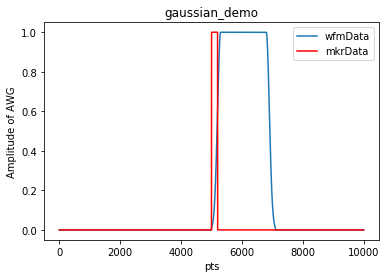

In [5]:
# Create a waveform with a gaussian brick
sigma = 100
flat = 1500
num_sigma = 3
wfm_totlen = 10000
start_offset = 5000
# Create a mkrData
mkr_tone = 'mkr1'
mkr_duration = 200


# Create a gaussian waveform with markerData
gauss_brick = leco.gauss_square_pulse(sigma, flat, num_sigma)
wfmData = leco.waveform_shape(wfm_totlen, start_offset, gauss_brick)
mkrData = leco.marker_shape(wfm_totlen, start_offset, mkr_duration)
# store into a dict
properties = {'wfm_name':'gaussian_demo', 'wfmData': wfmData,
             'mkr_tone':mkr_tone, 'mkrData': mkrData}
plt_wfmData_with_mkrData(properties)

In [6]:
inst_name = 'Tektronix_AWG5208'
inst_address = 'TCPIP0::192.168.50.48::inst0::INSTR'
timeout = 10
Clean_Option = True
sample_rate = 1E9
ref_ext = 10E6

# initialize AWG settings
awgClient = Tektronix_AWG5208(inst_name, inst_address, timeout)
awgClient.connect()
if Clean_Option:awgClient.del_wlist();awgClient.del_slist()
awgClient.set_channel_mkr(1,0,0,0,0,0,0,0)
awgClient.set_sample_rate(sample_rate)
awgClient.set_extref_source(ref_ext)

Connect to Tektronix_AWG5208 successfully
Statement: TEKTRONIX,AWG5208,B030597,FV:6.6.0131.0


In [7]:
awgClient.send_wfmData_withmkr2AWG(
                properties['wfm_name'],
                properties['wfmData'],
                properties['mkrData'],
                properties['mkr_tone'])
awgClient.load_wfm_to_channel(1, properties['wfm_name'])

In [8]:
# disconnect the awg
awgClient.disconnect()

Tektronix_AWG5208 has been disconnected by user.
